In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PicksBanEDAFunctions import bar_plot, windelta_pressence

In [2]:
names = dict()
with open('../data/heroes.json') as f:
    data = json.load(f)
    for i in data:
        names[i["id"]] = i['localized_name']
df_heroes = pd.DataFrame.from_dict(names, orient='index', columns=['name'])

In [10]:
df = pd.read_csv("../data/liquid_picks_bans.csv")
df_win = pd.read_csv("../data/liquid_wins.csv")
df.head(23)

,Unnamed: 0,is_pick,hero_id,team,order,ord,match_id,team_id
0,0,False,63,Team Liquid,0,0,5490431444,Team Liquid
1,1,False,110,Team Secret,1,1,5490431444,Team Secret
2,2,False,126,Team Liquid,2,2,5490431444,Team Liquid
3,3,False,106,Team Secret,3,3,5490431444,Team Secret
4,4,False,66,Team Liquid,4,4,5490431444,Team Liquid
5,5,False,20,Team Secret,5,5,5490431444,Team Secret
6,6,False,58,Team Liquid,6,6,5490431444,Team Liquid
7,7,False,111,Team Secret,7,7,5490431444,Team Secret
8,8,True,83,Team Liquid,8,8,5490431444,Team Liquid
9,9,True,65,Team Secret,9,9,5490431444,Team Secret


In [19]:
df.fi

1

In [14]:
for i in df.groupby('match_id'):
    i['p_hero_id'] = i['hero_id'].shift(1)
    i.fillna(0)

rder  ord    match_id  \
  176         176    False      110   Virtus.pro      0    0  5482451181   
  177         177    False      105  Team Liquid      1    1  5482451181   
  178         178    False      111   Virtus.pro      2    2  5482451181   
  179         179    False       83  Team Liquid      3    3  5482451181   
  180         180    False       38   Virtus.pro      4    4  5482451181   
  181         181    False       53  Team Liquid      5    5  5482451181   
  182         182    False       49   Virtus.pro      6    6  5482451181   
  183         183    False      106  Team Liquid      7    7  5482451181   
  184         184     True       39   Virtus.pro      8    8  5482451181   
  185         185     True       20  Team Liquid      9    9  5482451181   
  186         186     True       48  Team Liquid     10   10  5482451181   
  187         187     True       79   Virtus.pro     11   11  5482451181   
  188         188    False       61   Virtus.pro     12   12  5

In [26]:
df_win.head()

,Unnamed: 0,match_id,winner
0,0,5490431444,Team Secret
1,1,5490337091,Team Secret
2,2,5488049930,Nigma
3,3,5487987325,Nigma
4,4,5487920183,Team Liquid


In [27]:
df_names = df.replace({'hero_id' : names})
df_names.head(10)

,Unnamed: 0,hero_id,is_pick,match_id,ord,order,team
0,0,Weaver,False,5490431444,0,0,Team Liquid
1,1,Phoenix,False,5490431444,1,1,Team Secret
2,2,Void Spirit,False,5490431444,2,2,Team Liquid
3,3,Ember Spirit,False,5490431444,3,3,Team Secret
4,4,Chen,False,5490431444,4,4,Team Liquid
5,5,Vengeful Spirit,False,5490431444,5,5,Team Secret
6,6,Enchantress,False,5490431444,6,6,Team Liquid
7,7,Oracle,False,5490431444,7,7,Team Secret
8,8,Treant Protector,True,5490431444,8,8,Team Liquid
9,9,Batrider,True,5490431444,9,9,Team Secret


In [28]:
bans = df_names['is_pick'] == False
df_bans = df_names[bans]
picks = df_names['is_pick'] == True
df_picks = df_names[picks]
df_picks.head(10)

,Unnamed: 0,hero_id,is_pick,match_id,ord,order,team
8,8,Treant Protector,True,5490431444,8,8,Team Liquid
9,9,Batrider,True,5490431444,9,9,Team Secret
10,10,Earth Spirit,True,5490431444,10,10,Team Secret
11,11,Queen of Pain,True,5490431444,11,11,Team Liquid
14,14,Puck,True,5490431444,14,14,Team Secret
15,15,Disruptor,True,5490431444,15,15,Team Liquid
16,16,Kunkka,True,5490431444,16,16,Team Secret
17,17,Lone Druid,True,5490431444,17,17,Team Liquid
20,20,Pangolier,True,5490431444,20,20,Team Liquid
21,21,Broodmother,True,5490431444,21,21,Team Secret


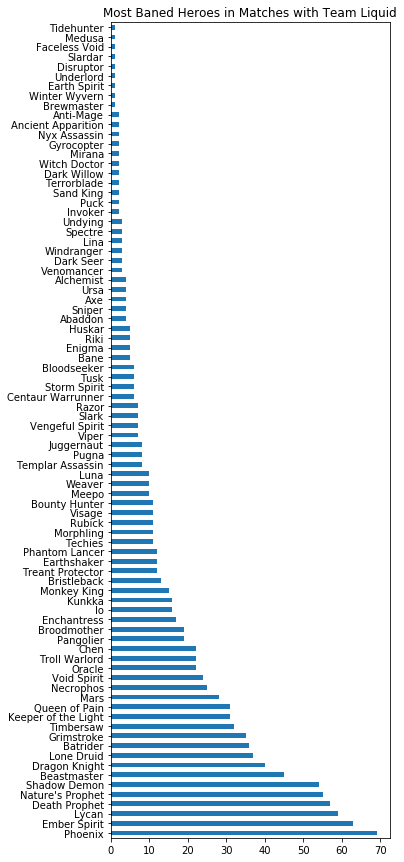

In [29]:
bar_plot(df_bans['hero_id'], "Most Baned Heroes in Matches with Team Liquid")

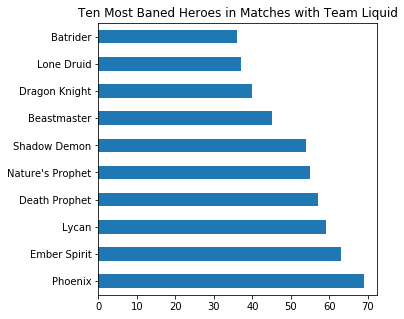

In [30]:
bar_plot(df_bans['hero_id'], "Ten Most Baned Heroes in Matches with Team Liquid", figsize=(5,5), number_col=10)

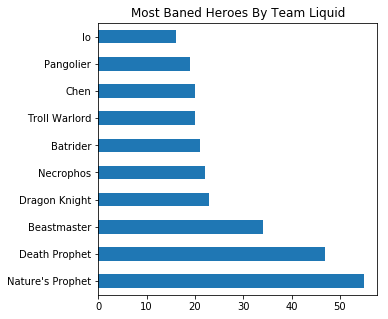

In [31]:
mask = df_bans['team'] == 'Team Liquid'
bar_plot(df_bans[mask]['hero_id'], "Most Baned Heroes By Team Liquid", figsize=(5,5), number_col=10)

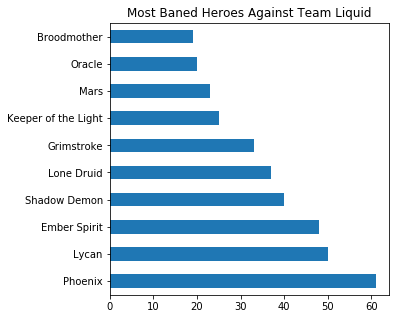

In [32]:
bar_plot(df_bans[~mask]['hero_id'], "Most Baned Heroes Against Team Liquid", figsize=(5,5), number_col=10)

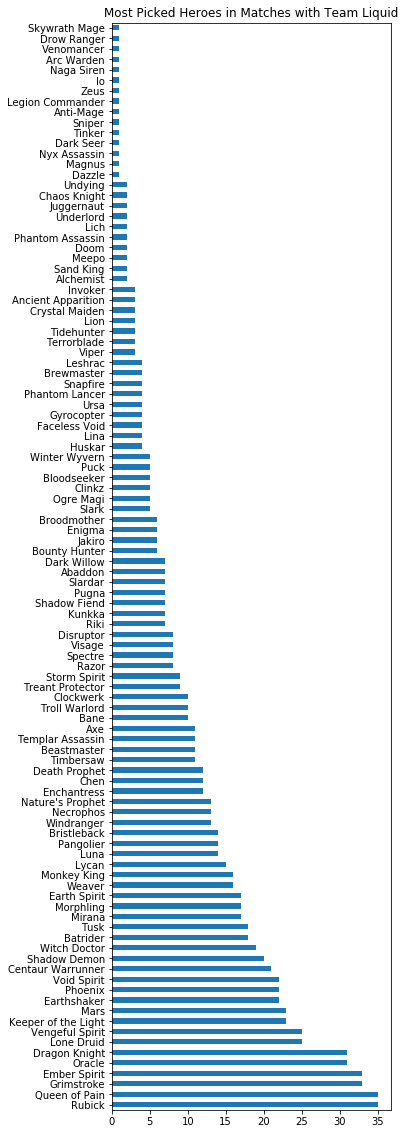

In [33]:
bar_plot(df_picks['hero_id'], "Most Picked Heroes in Matches with Team Liquid", figsize=(5,20))

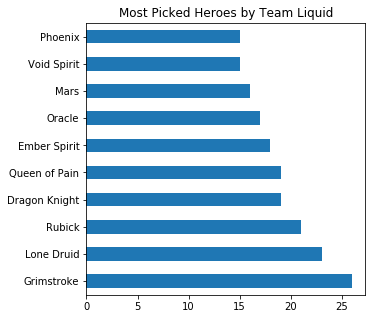

In [34]:
mask = df_picks['team'] == 'Team Liquid'
bar_plot(df_picks[mask]['hero_id'], "Most Picked Heroes by Team Liquid", figsize=(5,5), number_col=10)

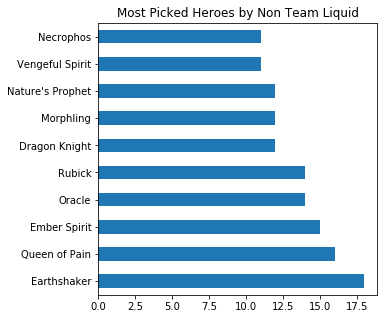

In [35]:
bar_plot(df_picks[~mask]['hero_id'], "Most Picked Heroes by Non Team Liquid", figsize=(5,5), number_col=10)

In [36]:
liquid_test = windelta_pressence(df_picks,df_win,"Team Liquid", df_heroes)
liquid_test.head()

,name,number_of_losses,number_of_wins,win_delta,pressence
2,Axe,2.0,6.0,0.04,0.08
3,Bane,0.0,3.0,0.03,0.03
4,Bloodseeker,1.0,3.0,0.02,0.04
6,Drow Ranger,1.0,0.0,-0.01,0.01
7,Earthshaker,2.0,2.0,0.00,0.04


In [37]:
def plot_balance(df, title, figsize=(20,20)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    df.plot('pressence', 'win_delta', kind='scatter', ax=ax)
    for i, xy in df[['name','pressence', 'win_delta']].iterrows():
        ax.annotate(xy[0], xy[1:])
    ax.hlines(0, 0, max(df['pressence']) + .05)
    ax.vlines(0.1, min(df['win_delta']) - .05 , max(df['win_delta']) + .05)
    fig.canvas.draw()

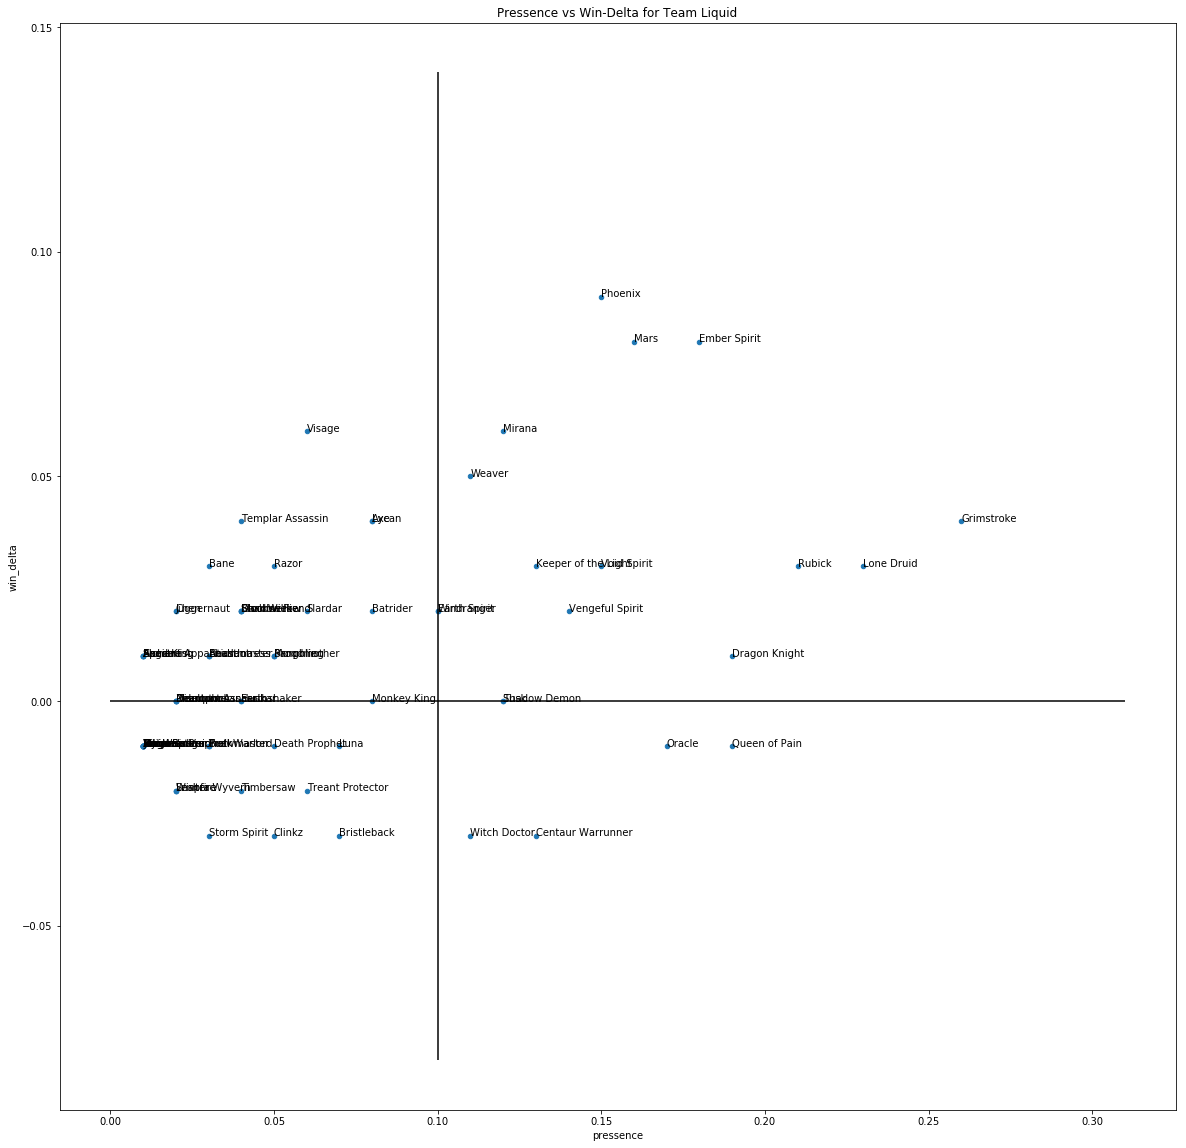

In [38]:
plot_balance(liquid_test, "Pressence vs Win-Delta for Team Liquid")